# Trial

Essential libraries

In [160]:
import numpy as np
import matplotlib.pyplot as plt

Making arrays of N, Z, A and y the binding Energies

In [161]:
N = np.genfromtxt('expthediff.dat',usecols=0) #Number of neutrons
Z = np.genfromtxt('expthediff.dat',usecols=1) #Number of protons
A = N+Z # Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y = np.genfromtxt('expthediff.dat',usecols=2)



# Initial Plots of N, Z, A to Binding Energies

Binding Energies against Number of Protons

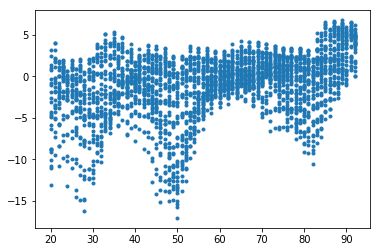

In [162]:
plt.plot(Z,y,'o',markersize=3)
plt.show()

Binding Energies against Number of Neutrons

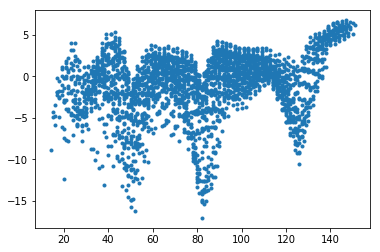

In [163]:
plt.plot(N,y,'o',markersize=3)
plt.show()

Binding Energies against Number of Atomic Number

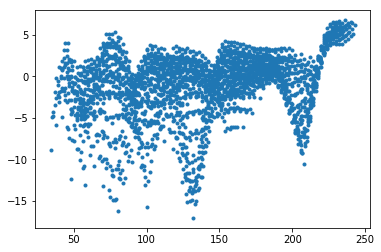

In [164]:
plt.plot(A,y,'o',markersize=3)
plt.show()

N vs Z with Binding Energies indicated in color

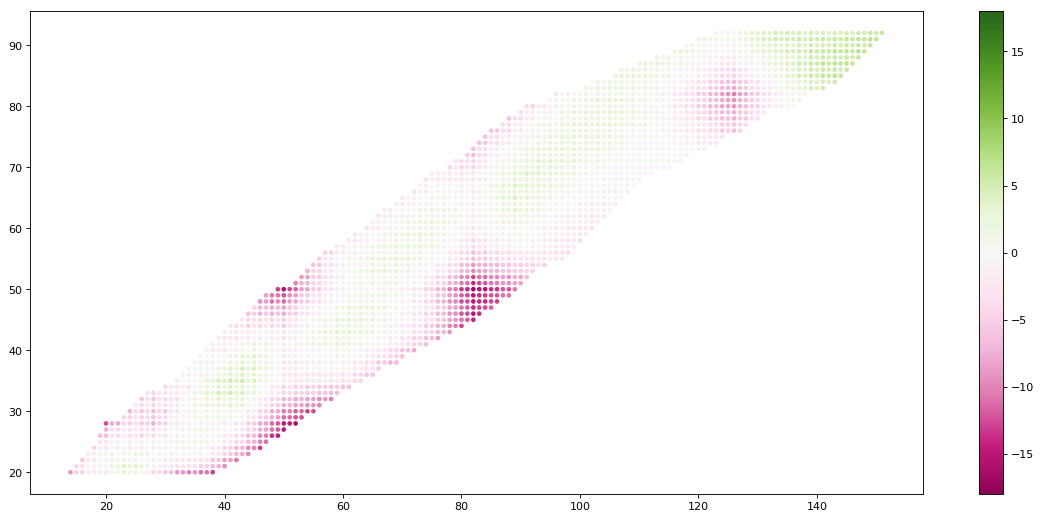

In [165]:
ext = np.int(np.ceil(max(-np.min(y),np.max(y))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N,Z,c=y,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

Splitting test data set into train and test est

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score


# Making rf the Random Forest object

Using Scaling innitially

In [183]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(Xs_train, y_train);


In [188]:
predictions=rf.predict(Xs_train)
errors = abs(predictions-y_train)
print('Without Magic Numbers as Features')
print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
print('Median Absolute Error for train data:', round(np.median(errors), 5), '\n')
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf.predict(Xs_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5) )
print('Median Absolute Error for test data:', round(np.median(errors), 5), '\n\n')
Etest1=np.mean(errors)
Emedtest1=np.median(errors)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf.score(Xs_train, y_train)
testscore1=rf.score(Xs_test, y_test)

print('The coefficient of determination for training: ', round(trainscore1,5))
print('The coefficient of determination for testing: ', round(testscore1,5))


#print(decision_path(rf, Xs_train))
print(rf.decision_path(Xs_train))

Without Magic Numbers as Features
Mean Absolute Error for train data: 0.22563
Median Absolute Error for train data: 0.20245 

Mean Absolute Error for test data: 0.57474
Median Absolute Error for test data: 0.52121 


The coefficient of determination for training:  0.99457
The coefficient of determination for testing:  0.96349
(<2021x2551688 sparse matrix of type '<class 'numpy.int64'>'
	with 27682912 stored elements in Compressed Sparse Row format>, array([      0,    2557,    5108, ..., 2546594, 2549097, 2551688],
      dtype=int32))


# Feature Importance for N and Z

In [138]:
#Paramater Weight 
print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')



N: 0.539818334616955
Z: 0.4601816653830448 



# Graphing

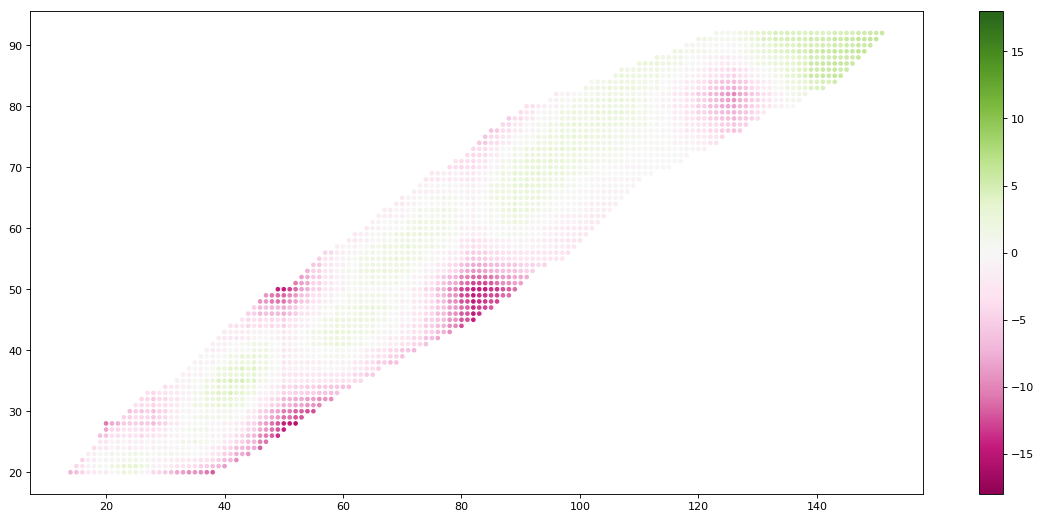

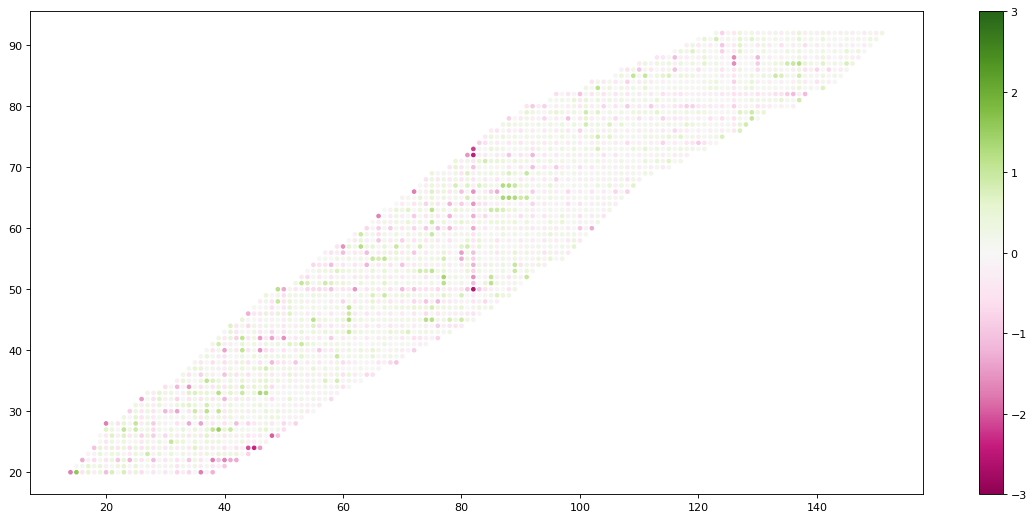

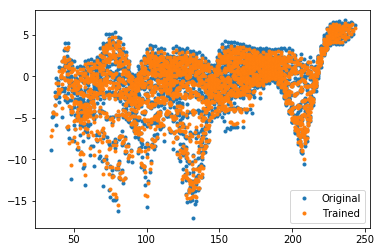

In [141]:
Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 


fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()


# adding magic numbers as a feature




In [189]:
X=np.transpose(np.stack((N,Z,N+Z,N-Z,np.exp(-(20-N)**2/20.),np.exp(-(20-Z)**2/20.),np.exp(-(28-N)**2/20.),np.exp(-(28-Z)**2/20.),np.exp(-(50-N)**2/20.),np.exp(-(50-Z)**2/20.),np.exp(-(80-N)**2/20.),np.exp(-(80-Z)**2/20.),np.exp(-(126-N)**2/20.),np.exp(-(126-Z)**2/20.))))

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score


In [190]:
# Instantiate model 
rf.fit(Xs_train, y_train);

In [191]:

print('Without magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data:', Etrain1)
print('Median Absolute Error for Xs_train data:', Emedtrain1, '\n')

print('Mean Absolute Error for Xs_test data:', Etest1)
print('Median Absolute Error for Xs_test data:', Emedtest1, '\n')

print('Mean Error difference between test and train data: ', round(Etest1-Etrain1, 5) )
print('Median Error difference  between test and train data: ', round(Emedtest1-Emedtrain1, 5), "\n\n\n")


predictions=rf.predict(Xs_train)
errors = abs(predictions- y_train)
Etrain2=np.mean(errors)
Emedtrain2=np.median(errors)

predictions=rf.predict(Xs_test)
errors = abs(predictions - y_test)
Etest2=np.mean(errors)
Emedtest2=np.median(errors)


print('With magic numbers as a feature:')

print('Mean Absolute Error for Xs_train data', Etrain2 )
print('Median Absolute Error for Xs_train data', Emedtrain2, '\n')

print('Mean Absolute Error for Xs_test data:', Etest2)
print('Median Absolute Error for Xs_test data:', Emedtest2, '\n')

print('Mean Error difference between test and train data: ', Etest2-Etrain2)
print('Median Error difference between test and train data: ', Emedtest2-Emedtrain2, '\n\n\n')


imprtest=Etest2-Etest1
imprtrain=Etrain2-Etrain1

imprmedtest=Emedtest2-Emedtest1
imprmedtrain=Emedtrain2-Emedtrain1


print('===================================================')
print('difference between the mean train error of with and without added features:', imprtrain)
print('difference between the mean test error of with and without added features', imprtest)

print('difference between the median train error of with and without added features', imprmedtrain)
print('difference between the median test error of with and without added features', imprmedtest)
print('===================================================', '\n\n\n')

trainscore2=rf.score(Xs_train, y_train)
testscore2=rf.score(Xs_test, y_test)



print('Without magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1, '\n')


print('With magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore2)
print('The coefficient of determination for testing: ', testscore2)
print('score difference: ', trainscore2-testscore2, '\n\n\n')

imprtestscore=testscore2-testscore1
imprtrainscore=trainscore2-trainscore1


print('===================================================')
print('Improvement of the train score:', imprtrainscore)
print('Improvement of the test score:', imprtestscore)
print('difference between the train score of with and without added features:', imprtrainscore)
print('difference between the test score of with and without added features', imprtestscore)

print('===================================================', '\n\n\n')



Without magic numbers as a feature:
Mean Absolute Error for Xs_train data: 0.22563004418942215
Median Absolute Error for Xs_train data: 0.20244726379810962 

Mean Absolute Error for Xs_test data: 0.5747356737021843
Median Absolute Error for Xs_test data: 0.521205627760015 

Mean Error difference between test and train data:  0.34911
Median Error difference  between test and train data:  0.31876 



With magic numbers as a feature:
Mean Absolute Error for Xs_train data 0.27029255694077337
Median Absolute Error for Xs_train data 0.23472085525577646 

Mean Absolute Error for Xs_test data: 0.7672082213962316
Median Absolute Error for Xs_test data: 0.6963964226339773 

Mean Error difference between test and train data:  0.4969156644554582
Median Error difference between test and train data:  0.4616755673782008 



difference between the mean train error of with and without added features: 0.04466251275135122
difference between the mean test error of with and without added features 0.1924725

# Feature Importance

In [145]:

print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')

print('N+Z:', rf.feature_importances_[2])
print('N-Z:', rf.feature_importances_[3],   '\n')

print('20-N:', rf.feature_importances_[4])
print('20-Z:', rf.feature_importances_[5],  '\n')

print('28-N:', rf.feature_importances_[6])
print('28-Z:', rf.feature_importances_[7],  '\n')

print('50-N:', rf.feature_importances_[8])
print('50-Z:', rf.feature_importances_[9],  '\n')

print('80-N:', rf.feature_importances_[10])
print('80-Z:', rf.feature_importances_[11], '\n')

print('126-N:', rf.feature_importances_[12])
print('126-Z:', rf.feature_importances_[13],'\n')

rf.feature_importances_


N: 0.08586443236309654
Z: 0.11747379634125492 

N+Z: 0.1626276420202568
N-Z: 0.3326789142718809 

20-N: 0.0038697337181902596
20-Z: 0.027563356379097476 

28-N: 0.007301773502106148
28-Z: 0.02756351193947128 

50-N: 0.048065405407163746
50-Z: 0.08386697904612143 

80-N: 0.03467391086390185
80-Z: 0.02748997463925798 

126-N: 0.03930804518659322
126-Z: 0.0016525243216071216 



array([0.08586443, 0.1174738 , 0.16262764, 0.33267891, 0.00386973,
       0.02756336, 0.00730177, 0.02756351, 0.04806541, 0.08386698,
       0.03467391, 0.02748997, 0.03930805, 0.00165252])

# Graphing

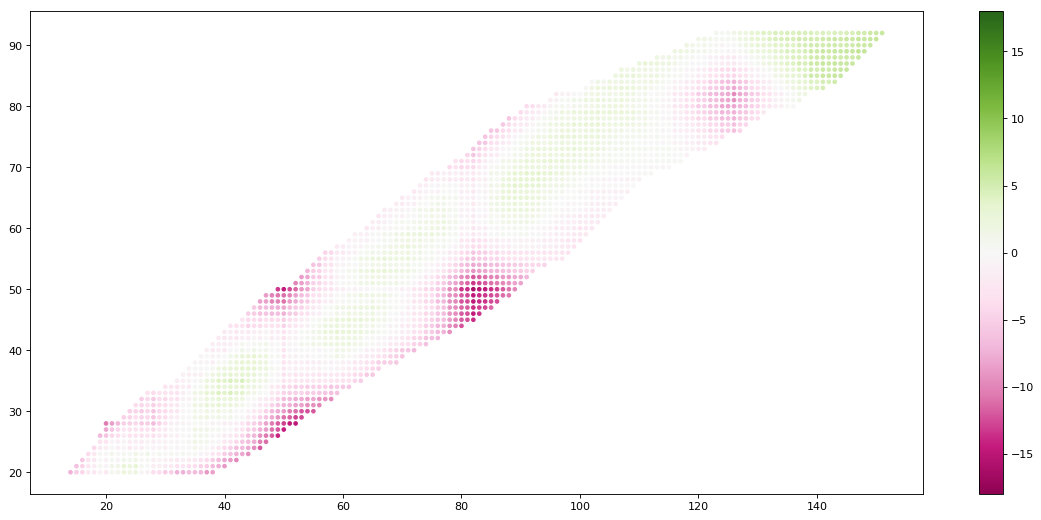

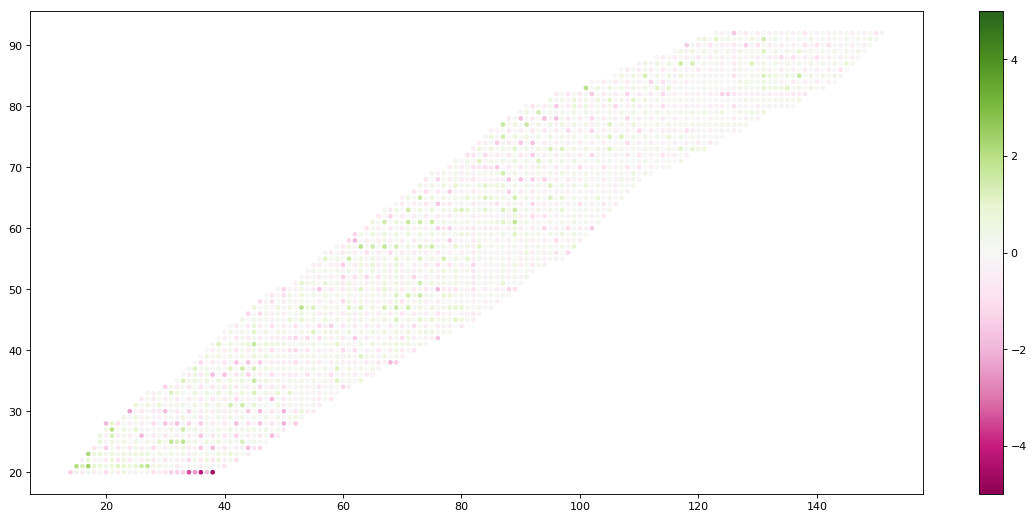

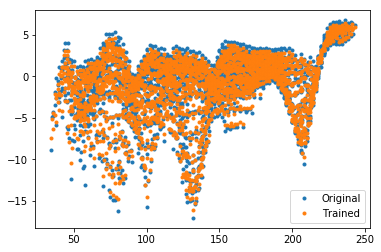

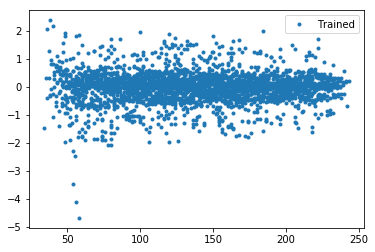

In [192]:
#Have to refit rf with all of X and y 
#Unlike with scaling

Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 

fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

#plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=3,label='Error')
plt.legend()
plt.show()




# Random Forest without Scaling 

Innitially without magic Numbers as Features.

In [147]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [148]:
# Instantiate model 
rf.fit(X_train, y_train);


In [149]:
predictions=rf.predict(X_train)
errors = abs(predictions-y_train)

print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
print('Median Absolute Error for train data:', round(np.median(errors), 5), '\n')
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5) )
print('Median Absolute Error for train data:', round(np.median(errors), 5),  '\n\n\n')
Etest1=np.mean(errors)
Emedtest1=np.median(errors)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf.score(X_train, y_train)
testscore1=rf.score(X_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)


Mean Absolute Error for train data: 0.23214
Median Absolute Error for train data: 0.20573 

Mean Absolute Error for test data: 0.62023
Median Absolute Error for train data: 0.55106 



The coefficient of determination for training:  0.9943328524905485
The coefficient of determination for testing:  0.9557069032315902
score difference:  0.038625949258958236


In [150]:
#Feature Importance

print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')



N: 0.5534935851390889
Z: 0.4465064148609106 



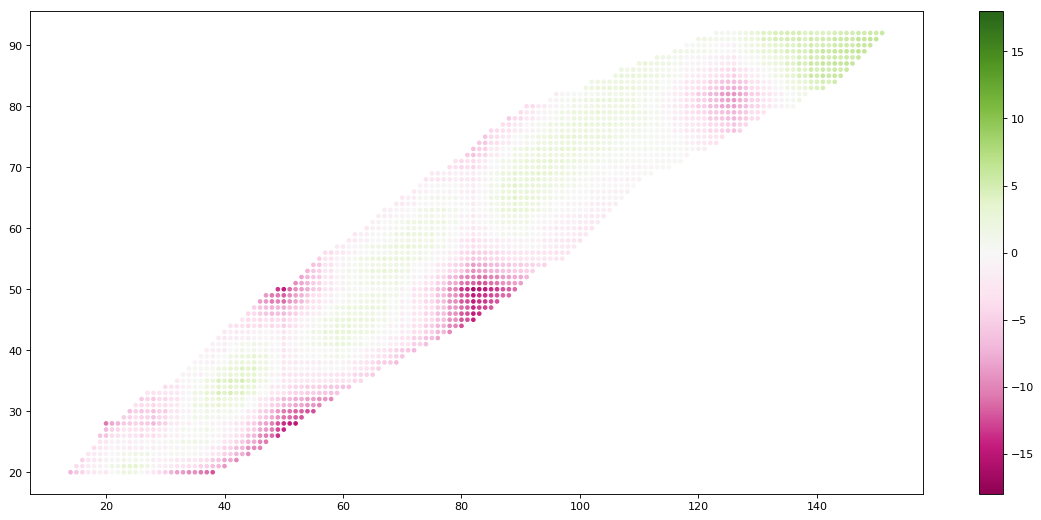

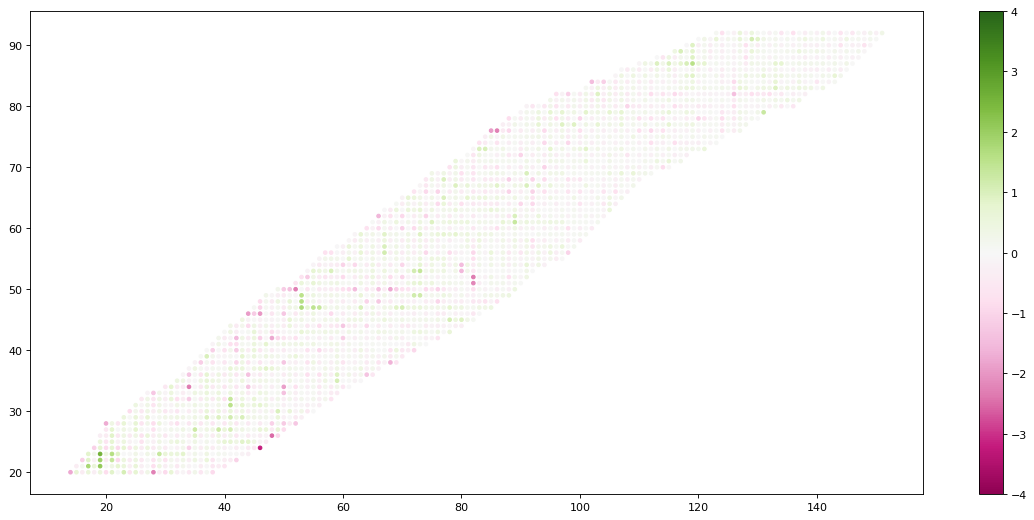

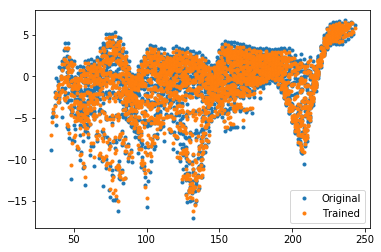

In [151]:

pred_all = rf.predict(X) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()


# adding magic numbers as a feature

still without scaling


In [152]:
X=np.transpose(np.stack((N,Z,N+Z,N-Z,np.exp(-(20-N)**2/20.),np.exp(-(20-Z)**2/20.),np.exp(-(28-N)**2/20.),np.exp(-(28-Z)**2/20.),np.exp(-(50-N)**2/20.),np.exp(-(50-Z)**2/20.),np.exp(-(80-N)**2/20.),np.exp(-(80-Z)**2/20.),np.exp(-(126-N)**2/20.),np.exp(-(126-Z)**2/20.))))

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [153]:
# Instantiate model 
rf.fit(X_train, y_train);

In [154]:

print('Without magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data:', round(Etrain1,5))
print('Median Absolute Error for Xs_train data:', round(Emedtrain1, 5), "\n")

print('Mean Absolute Error for Xs_test data:', round(Etest1,5))
print('Median Absolute Error for Xs_test data:', round(Emedtest1, 5), "\n")

print('Mean Error difference between test and train: ', round((Etest1-Etrain1),5) )
print('Median Error difference between test and train: ', round( (Emedtest1-Emedtrain1) ,5), "\n\n\n")


predictions=rf.predict(X_train)
errors = abs(predictions- y_train)
Etrain2=np.mean(errors)
Emedtrain2=np.median(errors)


predictions=rf.predict(X_test)
errors = abs(predictions - y_test)
Etest2=np.mean(errors)
Emedtest2=np.median(errors)


print('With magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data', round(Etrain2, 5) )
print('Median Absolute Error for Xs_train data', round(Emedtrain2, 5), '\n' )


print('Mean Absolute Error for Xs_test data:', round(Etest2, 5))
print('Median Absolute Error for Xs_test data:', round(Emedtest2, 5), '\n')

print('Mean Error difference: ', round((Etest2-Etrain2),5))
print('Median Error difference: ', round((Emedtest2-Emedtrain2),5),  '\n\n\n')


imprtest=Etest2-Etest1
imprtrain=Etrain2-Etrain1

imprmedtest=Emedtest2-Emedtest1
imprmedtrain=Emedtrain2-Emedtrain1

print('===================================================')
print('Improvement of the mean train error:', round(imprtrain,5))
print('Improvement of the mean test error:',  round(imprtest,5 ), '\n')

print('Improvement of the median train error:', round(imprmedtrain,5))
print('Improvement of the median test error:',  round(imprmedtest,5 ))
print('===================================================', '\n\n\n')

trainscore2=rf.score(X_train, y_train)
testscore2=rf.score(X_test, y_test)



print('Without magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1, '\n')


print('With magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore2)
print('The coefficient of determination for testing: ', testscore2)
print('score difference: ', trainscore2-testscore2, '\n\n\n')

imprtestscore=testscore2-testscore1
imprtrainscore=trainscore2-trainscore1


print('===================================================')
print('Improvement of the train score:', imprtrainscore)
print('Improvement of the test score:', imprtestscore)
print('===================================================', '\n\n\n')



Without magic numbers as a feature:
Mean Absolute Error for Xs_train data: 0.23214
Median Absolute Error for Xs_train data: 0.20573 

Mean Absolute Error for Xs_test data: 0.62023
Median Absolute Error for Xs_test data: 0.55106 

Mean Error difference between test and train:  0.38809
Median Error difference between test and train:  0.34533 



With magic numbers as a feature:
Mean Absolute Error for Xs_train data 0.27718
Median Absolute Error for Xs_train data 0.24355 

Mean Absolute Error for Xs_test data: 0.73606
Median Absolute Error for Xs_test data: 0.66728 

Mean Error difference:  0.45888
Median Error difference:  0.42374 



Improvement of the mean train error: 0.04504
Improvement of the mean test error: 0.11583 

Improvement of the median train error: 0.03782
Improvement of the median test error: 0.11623



Without magic numbers as a feature:
The coefficient of determination for training:  0.9943328524905485
The coefficient of determination for testing:  0.9557069032315902
sco

In [155]:
print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')

print('N+Z:', rf.feature_importances_[2])
print('N-Z:', rf.feature_importances_[3],   '\n')

print('20-N:', rf.feature_importances_[4])
print('20-Z:', rf.feature_importances_[5],  '\n')

print('28-N:', rf.feature_importances_[6])
print('28-Z:', rf.feature_importances_[7],  '\n')

print('50-N:', rf.feature_importances_[8])
print('50-Z:', rf.feature_importances_[9],  '\n')

print('80-N:', rf.feature_importances_[10])
print('80-Z:', rf.feature_importances_[11], '\n')

print('126-N:', rf.feature_importances_[12])
print('126-Z:', rf.feature_importances_[13],'\n')

rf.feature_importances_


N: 0.12994776784685175
Z: 0.20367128112292057 

N+Z: 0.13763934109028267
N-Z: 0.26519343236952975 

20-N: 0.0036070238329622955
20-Z: 0.0280435218471421 

28-N: 0.0063459244414009785
28-Z: 0.023381901444400457 

50-N: 0.05816007516213819
50-Z: 0.04749975981576699 

80-N: 0.02422355501382698
80-Z: 0.027711725893830294 

126-N: 0.04457469011894687
126-Z: 0.0 



array([0.12994777, 0.20367128, 0.13763934, 0.26519343, 0.00360702,
       0.02804352, 0.00634592, 0.0233819 , 0.05816008, 0.04749976,
       0.02422356, 0.02771173, 0.04457469, 0.        ])

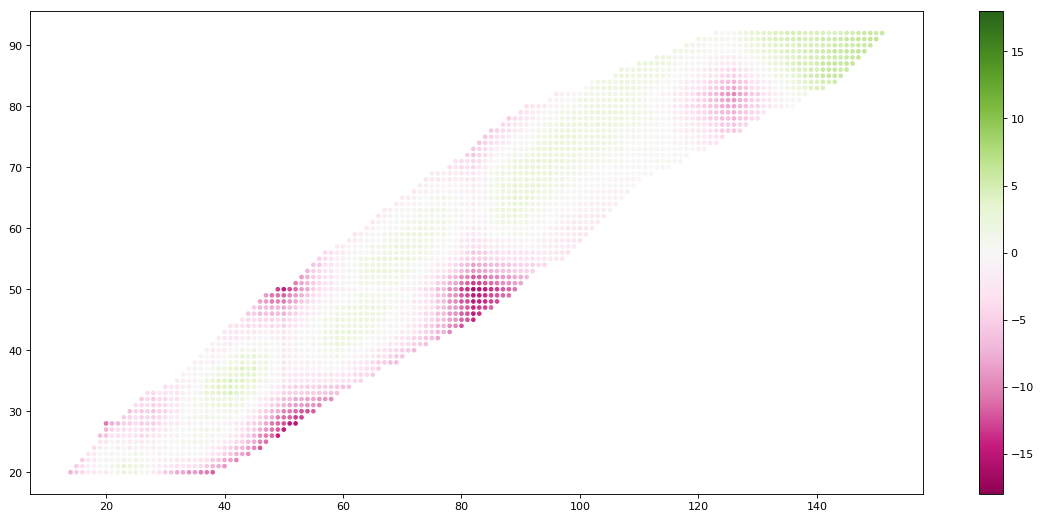

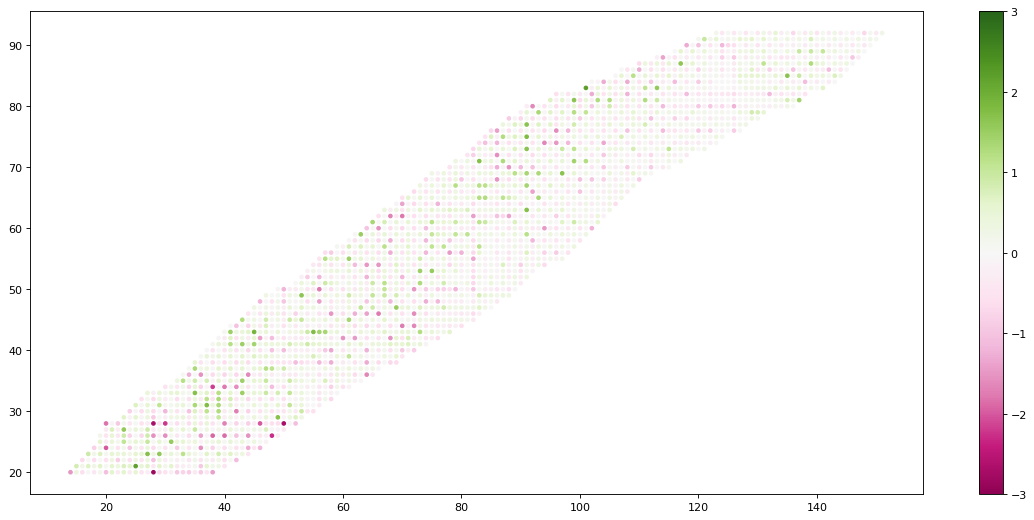

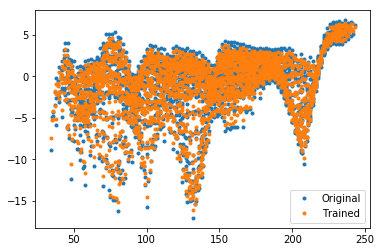

In [157]:
#Have to refit rf with all of X and y 
#Unlike with scaling

pred_all = rf.predict(X) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()



# Evaluating RF parameters

In [172]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [173]:
scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score


In [174]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [175]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(Xs_train, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished


{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}


-0.23622101721032518


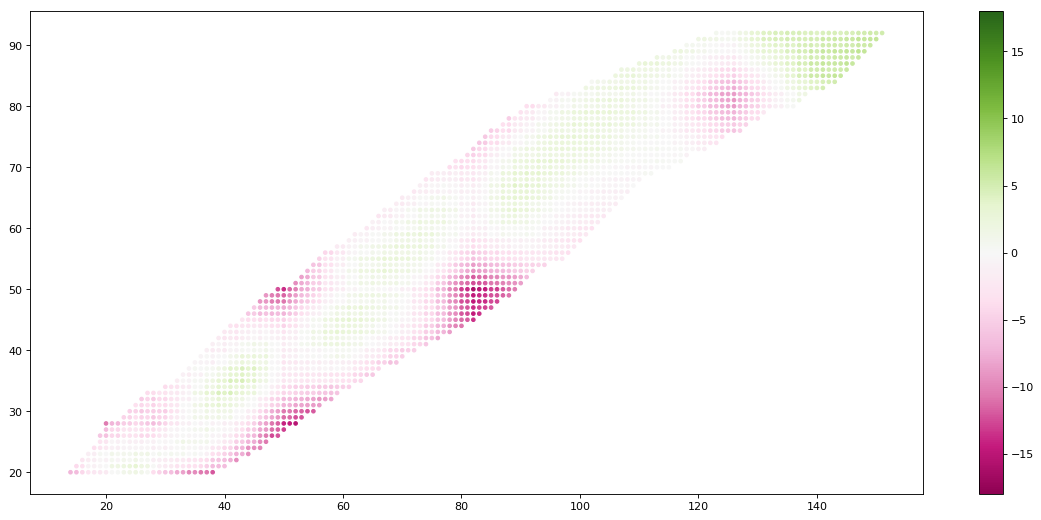

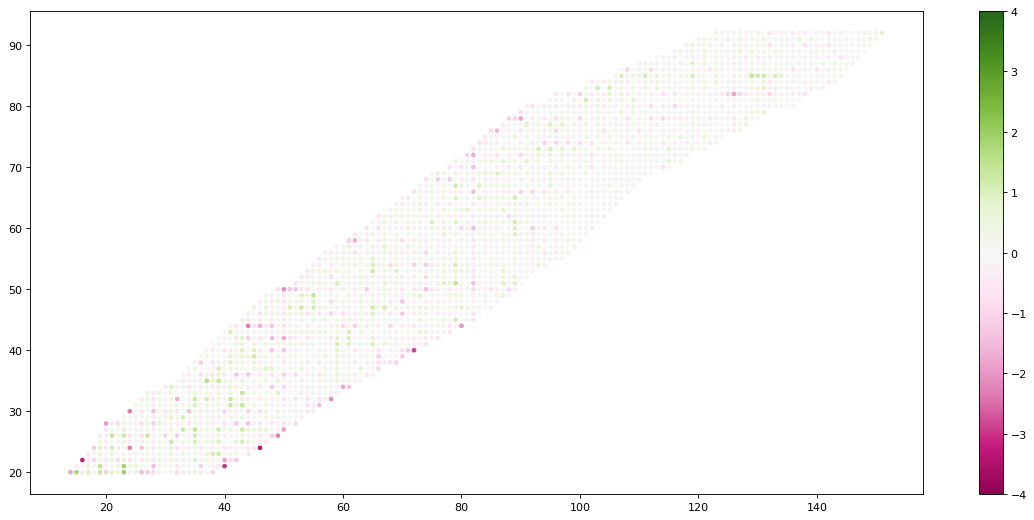

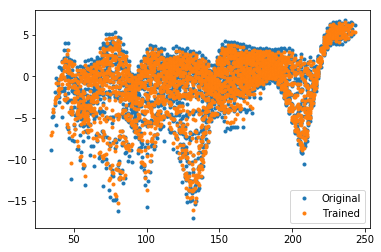

In [176]:
#Have to refit rf with all of X and y 
#Unlike with scaling
print(rf_random.score(Xs_train, y_train))
Xs = scaler.transform(X)
pred_all = rf_random.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

In [178]:
predictions=rf_random.predict(Xs_train)
errors = abs(predictions-y_train)
print('Without Magic Numbers as Features')
print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
Etrain1=round(np.mean(errors), 5)


predictions=rf_random.predict(Xs_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5), '\n\n' )
Etest1=round(np.mean(errors), 5)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf_random.score(Xs_train, y_train)
testscore1=rf_random.score(Xs_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)
rf_random.get_params()
rf_random.best_params_


Without Magic Numbers as Features
Mean Absolute Error for train data: 0.23622
Mean Absolute Error for test data: 0.66025 


The coefficient of determination for training:  -0.23622101721032518
The coefficient of determination for testing:  -0.660250321429176
score difference:  0.42402930421885077


{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [49]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 6, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(Xs_train, y_train)
print(rf_random.best_params_)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  9.5min finished


{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}


-0.22297818785420878


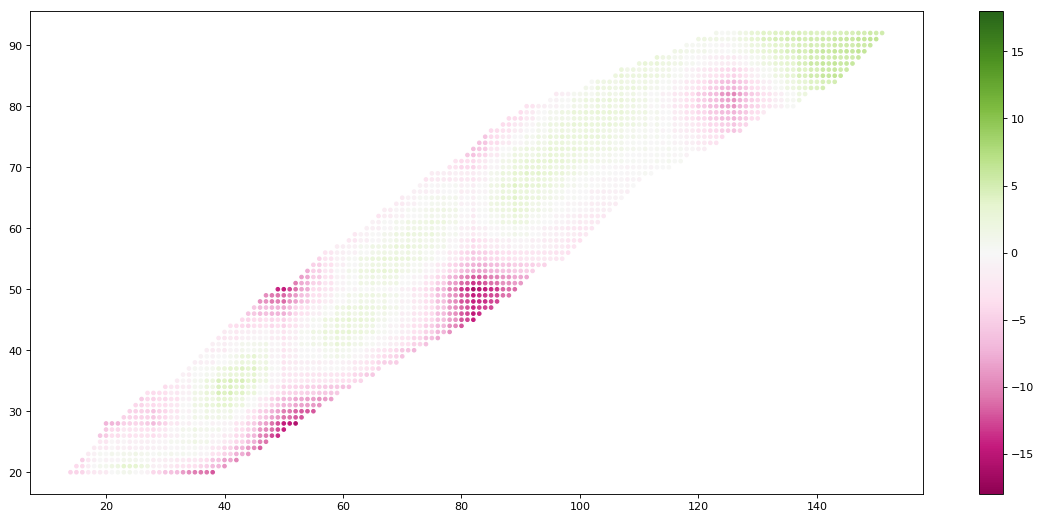

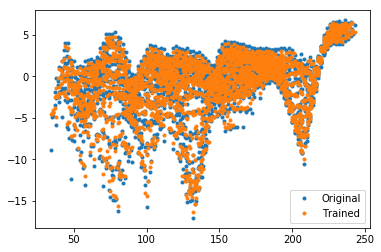

In [50]:
#Have to refit rf with all of X and y 
#Unlike with scaling
print(rf_random.score(Xs_train, y_train))
Xs = scaler.transform(X)
pred_all = rf_random.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()